In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_caffe_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                filters=3, kernel_size=(11, 11), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(
                filters=16, kernel_size=(5, 5), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(
                filters=96, kernel_size=(3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(units=2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(units=2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(units=preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [7]:
caffe_net_wrapper = ModelWrapper("CaffeNet", preprocessing_utils=preprocessing_utils)

In [8]:
caffe_net_wrapper.build_model(build_fn=build_caffe_net, model_name=caffe_net_wrapper.model_name)

Building model...
Model: "CaffeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 3)       1092      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 3)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 123, 123, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 16)      1216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                        

In [9]:
caffe_net_wrapper.train_and_save_model_and_history()

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 114.6927 - accuracy: 0.0516
Epoch 1: val_loss improved from inf to 57.68774, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 14s 661ms/step - loss: 114.6927 - accuracy: 0.0516 - val_loss: 57.6877 - val_accuracy: 0.0138 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 50.6573 - accuracy: 0.0355
Epoch 2: val_loss improved from 57.68774 to 40.07085, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 575ms/step - loss: 50.6573 - accuracy: 0.0355 - val_loss: 40.0708 - val_accuracy: 0.0691 - lr: 0.0010
Epoch 3/100
8/9 [=========================>....] - ETA: 0s - loss: 36.1950 - accuracy: 0.0785
Epoch 3: val_loss improved from 40.07085 to 33.08619, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 589ms/step - loss: 36.1038 - accuracy: 0.0791 - val_loss: 33.0862 - val_accuracy: 0.0323 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 29.7499 - accuracy: 0.1447
Epoch 4: val_loss improved from 33.08619 to 28.25059, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 658ms/step - loss: 29.7499 - accuracy: 0.1447 - val_loss: 28.2506 - val_accuracy: 0.0461 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - ETA: 0s - loss: 24.3027 - accuracy: 0.1851
Epoch 5: val_loss improved from 28.25059 to 24.28787, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 605ms/step - loss: 24.3027 - accuracy: 0.1851 - val_loss: 24.2879 - val_accuracy: 0.0230 - lr: 0.0010
Epoch 6/100
8/9 [=========================>....] - ETA: 0s - loss: 20.0709 - accuracy: 0.1822
Epoch 6: val_loss improved from 24.28787 to 19.92050, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 587ms/step - loss: 20.0244 - accuracy: 0.1824 - val_loss: 19.9205 - val_accuracy: 0.0507 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - ETA: 0s - loss: 16.7203 - accuracy: 0.2238
Epoch 7: val_loss improved from 19.92050 to 17.98586, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 542ms/step - loss: 16.7203 - accuracy: 0.2238 - val_loss: 17.9859 - val_accuracy: 0.0599 - lr: 0.0010
Epoch 8/100
8/9 [=========================>....] - ETA: 0s - loss: 14.2481 - accuracy: 0.2415
Epoch 8: val_loss improved from 17.98586 to 14.95428, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 529ms/step - loss: 14.2206 - accuracy: 0.2418 - val_loss: 14.9543 - val_accuracy: 0.0553 - lr: 0.0010
Epoch 9/100
9/9 [==============================] - ETA: 0s - loss: 12.5116 - accuracy: 0.2457
Epoch 9: val_loss improved from 14.95428 to 13.23875, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 662ms/step - loss: 12.5116 - accuracy: 0.2457 - val_loss: 13.2387 - val_accuracy: 0.0968 - lr: 0.0010
Epoch 10/100
9/9 [==============================] - ETA: 0s - loss: 11.2743 - accuracy: 0.2705
Epoch 10: val_loss improved from 13.23875 to 12.38122, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 7s 814ms/step - loss: 11.2743 - accuracy: 0.2705 - val_loss: 12.3812 - val_accuracy: 0.0737 - lr: 0.0010
Epoch 11/100
9/9 [==============================] - ETA: 0s - loss: 10.4260 - accuracy: 0.2690
Epoch 11: val_loss improved from 12.38122 to 11.52367, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 7s 790ms/step - loss: 10.4260 - accuracy: 0.2690 - val_loss: 11.5237 - val_accuracy: 0.1060 - lr: 0.0010
Epoch 12/100
9/9 [==============================] - ETA: 0s - loss: 9.7222 - accuracy: 0.2977
Epoch 12: val_loss improved from 11.52367 to 10.64543, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 7s 829ms/step - loss: 9.7222 - accuracy: 0.2977 - val_loss: 10.6454 - val_accuracy: 0.0783 - lr: 0.0010
Epoch 13/100
9/9 [==============================] - ETA: 0s - loss: 9.3013 - accuracy: 0.2841
Epoch 13: val_loss did not improve from 10.64543
9/9 [==============================] - 4s 265ms/step - loss: 9.3013 - accuracy: 0.2841 - val_loss: 10.9406 - val_accuracy: 0.0645 - lr: 0.0010
Epoch 14/100
9/9 [==============================] - ETA: 0s - loss: 8.8947 - accuracy: 0.3262
Epoch 14: val_loss improved from 10.64543 to 10.42355, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 776ms/step - loss: 8.8947 - accuracy: 0.3262 - val_loss: 10.4235 - val_accuracy: 0.1014 - lr: 0.0010
Epoch 15/100
9/9 [==============================] - ETA: 0s - loss: 8.4761 - accuracy: 0.3476
Epoch 15: val_loss improved from 10.42355 to 10.09971, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 563ms/step - loss: 8.4761 - accuracy: 0.3476 - val_loss: 10.0997 - val_accuracy: 0.0645 - lr: 0.0010
Epoch 16/100
9/9 [==============================] - ETA: 0s - loss: 8.3637 - accuracy: 0.3320
Epoch 16: val_loss improved from 10.09971 to 9.50867, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 7s 831ms/step - loss: 8.3637 - accuracy: 0.3320 - val_loss: 9.5087 - val_accuracy: 0.1290 - lr: 0.0010
Epoch 17/100
9/9 [==============================] - ETA: 0s - loss: 8.0567 - accuracy: 0.3814
Epoch 17: val_loss did not improve from 9.50867
9/9 [==============================] - 2s 250ms/step - loss: 8.0567 - accuracy: 0.3814 - val_loss: 9.6887 - val_accuracy: 0.1152 - lr: 0.0010
Epoch 18/100
9/9 [==============================] - ETA: 0s - loss: 7.8377 - accuracy: 0.3992
Epoch 18: val_loss improved from 9.50867 to 9.31153, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 764ms/step - loss: 7.8377 - accuracy: 0.3992 - val_loss: 9.3115 - val_accuracy: 0.1382 - lr: 0.0010
Epoch 19/100
9/9 [==============================] - ETA: 0s - loss: 7.6910 - accuracy: 0.4230
Epoch 19: val_loss did not improve from 9.31153
9/9 [==============================] - 2s 222ms/step - loss: 7.6910 - accuracy: 0.4230 - val_loss: 9.3272 - val_accuracy: 0.1290 - lr: 0.0010
Epoch 20/100
9/9 [==============================] - ETA: 0s - loss: 7.5860 - accuracy: 0.4230
Epoch 20: val_loss improved from 9.31153 to 8.86814, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 764ms/step - loss: 7.5860 - accuracy: 0.4230 - val_loss: 8.8681 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 21/100
9/9 [==============================] - ETA: 0s - loss: 7.3227 - accuracy: 0.4753
Epoch 21: val_loss did not improve from 8.86814
9/9 [==============================] - 2s 216ms/step - loss: 7.3227 - accuracy: 0.4753 - val_loss: 9.2935 - val_accuracy: 0.1060 - lr: 0.0010
Epoch 22/100
9/9 [==============================] - ETA: 0s - loss: 7.3826 - accuracy: 0.4393
Epoch 22: val_loss improved from 8.86814 to 8.49928, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 749ms/step - loss: 7.3826 - accuracy: 0.4393 - val_loss: 8.4993 - val_accuracy: 0.1613 - lr: 0.0010
Epoch 23/100
9/9 [==============================] - ETA: 0s - loss: 7.0887 - accuracy: 0.5206
Epoch 23: val_loss improved from 8.49928 to 8.47148, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 747ms/step - loss: 7.0887 - accuracy: 0.5206 - val_loss: 8.4715 - val_accuracy: 0.2166 - lr: 0.0010
Epoch 24/100
9/9 [==============================] - ETA: 0s - loss: 6.9848 - accuracy: 0.5116
Epoch 24: val_loss did not improve from 8.47148
9/9 [==============================] - 2s 226ms/step - loss: 6.9848 - accuracy: 0.5116 - val_loss: 8.5999 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 25/100
9/9 [==============================] - ETA: 0s - loss: 6.7795 - accuracy: 0.5568
Epoch 25: val_loss did not improve from 8.47148
9/9 [==============================] - 2s 215ms/step - loss: 6.7795 - accuracy: 0.5568 - val_loss: 8.6528 - val_accuracy: 0.1982 - lr: 0.0010
Epoch 26/100
9/9 [==============================] - ETA: 0s - loss: 6.5890 - accuracy: 0.5945
Epoch 26: val_loss improved from 8.47148 to 8.34164, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 752ms/step - loss: 6.5890 - accuracy: 0.5945 - val_loss: 8.3416 - val_accuracy: 0.1935 - lr: 0.0010
Epoch 27/100
9/9 [==============================] - ETA: 0s - loss: 6.3820 - accuracy: 0.6183
Epoch 27: val_loss improved from 8.34164 to 8.31671, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 742ms/step - loss: 6.3820 - accuracy: 0.6183 - val_loss: 8.3167 - val_accuracy: 0.1751 - lr: 0.0010
Epoch 28/100
9/9 [==============================] - ETA: 0s - loss: 6.3479 - accuracy: 0.6042
Epoch 28: val_loss did not improve from 8.31671
9/9 [==============================] - 2s 215ms/step - loss: 6.3479 - accuracy: 0.6042 - val_loss: 8.3632 - val_accuracy: 0.1982 - lr: 0.0010
Epoch 29/100
9/9 [==============================] - ETA: 0s - loss: 6.1560 - accuracy: 0.6573
Epoch 29: val_loss did not improve from 8.31671
9/9 [==============================] - 2s 216ms/step - loss: 6.1560 - accuracy: 0.6573 - val_loss: 8.3471 - val_accuracy: 0.2350 - lr: 0.0010
Epoch 30/100
9/9 [==============================] - ETA: 0s - loss: 6.0491 - accuracy: 0.6733
Epoch 30: val_loss improved from 8.31671 to 8.15407, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 728ms/step - loss: 6.0491 - accuracy: 0.6733 - val_loss: 8.1541 - val_accuracy: 0.2258 - lr: 0.0010
Epoch 31/100
9/9 [==============================] - ETA: 0s - loss: 5.9000 - accuracy: 0.6957
Epoch 31: val_loss did not improve from 8.15407
9/9 [==============================] - 2s 216ms/step - loss: 5.9000 - accuracy: 0.6957 - val_loss: 8.2727 - val_accuracy: 0.2350 - lr: 0.0010
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 5.7713 - accuracy: 0.7181
Epoch 32: val_loss did not improve from 8.15407
9/9 [==============================] - 2s 218ms/step - loss: 5.7713 - accuracy: 0.7181 - val_loss: 8.5006 - val_accuracy: 0.1797 - lr: 0.0010
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 5.7213 - accuracy: 0.7076
Epoch 33: val_loss did not improve from 8.15407
9/9 [==============================] - 2s 233ms/step - loss: 5.7213 - accuracy: 0.7076 - val_loss: 8.2516 - val_accuracy: 0.1889 - lr: 0.0010
Epoch 

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 6s 713ms/step - loss: 5.3803 - accuracy: 0.8205 - val_loss: 8.0252 - val_accuracy: 0.2627 - lr: 5.0000e-04
Epoch 35/100
8/9 [=========================>....] - ETA: 0s - loss: 5.1031 - accuracy: 0.8880
Epoch 35: val_loss improved from 8.02516 to 7.75362, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 540ms/step - loss: 5.0996 - accuracy: 0.8891 - val_loss: 7.7536 - val_accuracy: 0.2811 - lr: 5.0000e-04
Epoch 36/100
8/9 [=========================>....] - ETA: 0s - loss: 4.8839 - accuracy: 0.9097
Epoch 36: val_loss improved from 7.75362 to 7.71482, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 541ms/step - loss: 4.8839 - accuracy: 0.9100 - val_loss: 7.7148 - val_accuracy: 0.2535 - lr: 5.0000e-04
Epoch 37/100
8/9 [=========================>....] - ETA: 0s - loss: 4.7322 - accuracy: 0.9295
Epoch 37: val_loss improved from 7.71482 to 7.65913, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 549ms/step - loss: 4.7321 - accuracy: 0.9297 - val_loss: 7.6591 - val_accuracy: 0.2673 - lr: 5.0000e-04
Epoch 38/100
8/9 [=========================>....] - ETA: 0s - loss: 4.5959 - accuracy: 0.9488
Epoch 38: val_loss improved from 7.65913 to 7.63242, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 536ms/step - loss: 4.5963 - accuracy: 0.9482 - val_loss: 7.6324 - val_accuracy: 0.2719 - lr: 5.0000e-04
Epoch 39/100
8/9 [=========================>....] - ETA: 0s - loss: 4.5097 - accuracy: 0.9588
Epoch 39: val_loss improved from 7.63242 to 7.54678, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 528ms/step - loss: 4.5080 - accuracy: 0.9589 - val_loss: 7.5468 - val_accuracy: 0.2857 - lr: 5.0000e-04
Epoch 40/100
8/9 [=========================>....] - ETA: 0s - loss: 4.4181 - accuracy: 0.9617
Epoch 40: val_loss did not improve from 7.54678
9/9 [==============================] - 2s 157ms/step - loss: 4.4200 - accuracy: 0.9608 - val_loss: 7.6841 - val_accuracy: 0.2765 - lr: 5.0000e-04
Epoch 41/100
9/9 [==============================] - ETA: 0s - loss: 4.3612 - accuracy: 0.9621
Epoch 41: val_loss did not improve from 7.54678
9/9 [==============================] - 1s 165ms/step - loss: 4.3612 - accuracy: 0.9621 - val_loss: 7.7903 - val_accuracy: 0.2719 - lr: 5.0000e-04
Epoch 42/100
8/9 [=========================>....] - ETA: 0s - loss: 4.3328 - accuracy: 0.9475
Epoch 42: val_loss improved from 7.54678 to 7.51130, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 633ms/step - loss: 4.3348 - accuracy: 0.9467 - val_loss: 7.5113 - val_accuracy: 0.2581 - lr: 5.0000e-04
Epoch 43/100
9/9 [==============================] - ETA: 0s - loss: 4.2851 - accuracy: 0.9511
Epoch 43: val_loss did not improve from 7.51130
9/9 [==============================] - 3s 283ms/step - loss: 4.2851 - accuracy: 0.9511 - val_loss: 7.6068 - val_accuracy: 0.2581 - lr: 5.0000e-04
Epoch 44/100
9/9 [==============================] - ETA: 0s - loss: 4.2024 - accuracy: 0.9662
Epoch 44: val_loss did not improve from 7.51130
9/9 [==============================] - 2s 246ms/step - loss: 4.2024 - accuracy: 0.9662 - val_loss: 7.6218 - val_accuracy: 0.2304 - lr: 5.0000e-04
Epoch 45/100
9/9 [==============================] - ETA: 0s - loss: 4.1350 - accuracy: 0.9740
Epoch 45: val_loss improved from 7.51130 to 7.45613, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 622ms/step - loss: 4.1350 - accuracy: 0.9740 - val_loss: 7.4561 - val_accuracy: 0.2673 - lr: 5.0000e-04
Epoch 46/100
9/9 [==============================] - ETA: 0s - loss: 4.0767 - accuracy: 0.9781
Epoch 46: val_loss did not improve from 7.45613
9/9 [==============================] - 2s 224ms/step - loss: 4.0767 - accuracy: 0.9781 - val_loss: 7.7283 - val_accuracy: 0.2719 - lr: 5.0000e-04
Epoch 47/100
8/9 [=========================>....] - ETA: 0s - loss: 4.0675 - accuracy: 0.9657
Epoch 47: val_loss did not improve from 7.45613
9/9 [==============================] - 2s 181ms/step - loss: 4.0660 - accuracy: 0.9664 - val_loss: 7.5994 - val_accuracy: 0.2627 - lr: 5.0000e-04
Epoch 48/100
8/9 [=========================>....] - ETA: 0s - loss: 3.9967 - accuracy: 0.9705
Epoch 48: val_loss did not improve from 7.45613
9/9 [==============================] - 1s 156ms/step - loss: 3.9957 - accuracy: 0.9713 - val_loss: 7.4964 - val_accuracy: 0.2765 - lr: 5

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 550ms/step - loss: 3.9215 - accuracy: 0.9869 - val_loss: 7.4316 - val_accuracy: 0.2627 - lr: 2.5000e-04
Epoch 50/100
9/9 [==============================] - ETA: 0s - loss: 3.8489 - accuracy: 0.9966
Epoch 50: val_loss improved from 7.43162 to 7.42527, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 596ms/step - loss: 3.8489 - accuracy: 0.9966 - val_loss: 7.4253 - val_accuracy: 0.2811 - lr: 2.5000e-04
Epoch 51/100
9/9 [==============================] - ETA: 0s - loss: 3.8033 - accuracy: 0.9990
Epoch 51: val_loss did not improve from 7.42527
9/9 [==============================] - 2s 187ms/step - loss: 3.8033 - accuracy: 0.9990 - val_loss: 7.4884 - val_accuracy: 0.2673 - lr: 2.5000e-04
Epoch 52/100
9/9 [==============================] - ETA: 0s - loss: 3.7635 - accuracy: 1.0000
Epoch 52: val_loss did not improve from 7.42527
9/9 [==============================] - 2s 179ms/step - loss: 3.7635 - accuracy: 1.0000 - val_loss: 7.4253 - val_accuracy: 0.2488 - lr: 2.5000e-04
Epoch 53/100
9/9 [==============================] - ETA: 0s - loss: 3.7292 - accuracy: 0.9988
Epoch 53: val_loss improved from 7.42527 to 7.37278, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 553ms/step - loss: 3.7292 - accuracy: 0.9988 - val_loss: 7.3728 - val_accuracy: 0.2811 - lr: 2.5000e-04
Epoch 54/100
9/9 [==============================] - ETA: 0s - loss: 3.7007 - accuracy: 0.9993
Epoch 54: val_loss improved from 7.37278 to 7.30350, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 558ms/step - loss: 3.7007 - accuracy: 0.9993 - val_loss: 7.3035 - val_accuracy: 0.2627 - lr: 2.5000e-04
Epoch 55/100
9/9 [==============================] - ETA: 0s - loss: 3.6710 - accuracy: 0.9998
Epoch 55: val_loss did not improve from 7.30350
9/9 [==============================] - 2s 169ms/step - loss: 3.6710 - accuracy: 0.9998 - val_loss: 7.3403 - val_accuracy: 0.2719 - lr: 2.5000e-04
Epoch 56/100
9/9 [==============================] - ETA: 0s - loss: 3.6437 - accuracy: 1.0000
Epoch 56: val_loss did not improve from 7.30350
9/9 [==============================] - 1s 166ms/step - loss: 3.6437 - accuracy: 1.0000 - val_loss: 7.3167 - val_accuracy: 0.2765 - lr: 2.5000e-04
Epoch 57/100
9/9 [==============================] - ETA: 0s - loss: 3.6192 - accuracy: 1.0000
Epoch 57: val_loss did not improve from 7.30350
9/9 [==============================] - 3s 410ms/step - loss: 3.6192 - accuracy: 1.0000 - val_loss: 7.3141 - val_accuracy: 0.2811 - lr: 2

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 15s 2s/step - loss: 3.5925 - accuracy: 1.0000 - val_loss: 7.2430 - val_accuracy: 0.2719 - lr: 1.2500e-04
Epoch 59/100
9/9 [==============================] - ETA: 0s - loss: 3.5771 - accuracy: 1.0000
Epoch 59: val_loss improved from 7.24297 to 7.18129, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 16s 2s/step - loss: 3.5771 - accuracy: 1.0000 - val_loss: 7.1813 - val_accuracy: 0.2581 - lr: 1.2500e-04
Epoch 60/100
9/9 [==============================] - ETA: 0s - loss: 3.5637 - accuracy: 1.0000
Epoch 60: val_loss did not improve from 7.18129
9/9 [==============================] - 13s 1s/step - loss: 3.5637 - accuracy: 1.0000 - val_loss: 7.1818 - val_accuracy: 0.2765 - lr: 1.2500e-04
Epoch 61/100
9/9 [==============================] - ETA: 0s - loss: 3.5533 - accuracy: 1.0000
Epoch 61: val_loss did not improve from 7.18129
9/9 [==============================] - 12s 1s/step - loss: 3.5533 - accuracy: 1.0000 - val_loss: 7.2319 - val_accuracy: 0.2535 - lr: 1.2500e-04
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 3.5391 - accuracy: 1.0000
Epoch 62: val_loss improved from 7.18129 to 7.17681, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 15s 2s/step - loss: 3.5391 - accuracy: 1.0000 - val_loss: 7.1768 - val_accuracy: 0.2673 - lr: 1.2500e-04
Epoch 63/100
9/9 [==============================] - ETA: 0s - loss: 3.5268 - accuracy: 1.0000
Epoch 63: val_loss did not improve from 7.17681
9/9 [==============================] - 13s 1s/step - loss: 3.5268 - accuracy: 1.0000 - val_loss: 7.1811 - val_accuracy: 0.2673 - lr: 1.2500e-04
Epoch 64/100
9/9 [==============================] - ETA: 0s - loss: 3.5150 - accuracy: 1.0000
Epoch 64: val_loss improved from 7.17681 to 7.16982, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 15s 2s/step - loss: 3.5150 - accuracy: 1.0000 - val_loss: 7.1698 - val_accuracy: 0.2719 - lr: 1.2500e-04
Epoch 65/100
9/9 [==============================] - ETA: 0s - loss: 3.5027 - accuracy: 1.0000
Epoch 65: val_loss did not improve from 7.16982
9/9 [==============================] - 13s 1s/step - loss: 3.5027 - accuracy: 1.0000 - val_loss: 7.1790 - val_accuracy: 0.2719 - lr: 1.2500e-04
Epoch 66/100
9/9 [==============================] - ETA: 0s - loss: 3.4922 - accuracy: 1.0000
Epoch 66: val_loss did not improve from 7.16982
9/9 [==============================] - 13s 1s/step - loss: 3.4922 - accuracy: 1.0000 - val_loss: 7.1781 - val_accuracy: 0.2673 - lr: 1.2500e-04
Epoch 67/100
9/9 [==============================] - ETA: 0s - loss: 3.4799 - accuracy: 1.0000
Epoch 67: val_loss improved from 7.16982 to 7.15067, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 16s 2s/step - loss: 3.4799 - accuracy: 1.0000 - val_loss: 7.1507 - val_accuracy: 0.2627 - lr: 1.2500e-04
Epoch 68/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4683 - accuracy: 1.0000
Epoch 68: val_loss improved from 7.15067 to 7.14449, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 558ms/step - loss: 3.4682 - accuracy: 1.0000 - val_loss: 7.1445 - val_accuracy: 0.2765 - lr: 1.2500e-04
Epoch 69/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4563 - accuracy: 1.0000
Epoch 69: val_loss did not improve from 7.14449
9/9 [==============================] - 2s 163ms/step - loss: 3.4564 - accuracy: 1.0000 - val_loss: 7.1573 - val_accuracy: 0.2719 - lr: 1.2500e-04
Epoch 70/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4449 - accuracy: 1.0000
Epoch 70: val_loss did not improve from 7.14449
9/9 [==============================] - 1s 156ms/step - loss: 3.4446 - accuracy: 1.0000 - val_loss: 7.1965 - val_accuracy: 0.2673 - lr: 1.2500e-04
Epoch 71/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4320 - accuracy: 1.0000
Epoch 71: val_loss improved from 7.14449 to 7.13508, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 4s 526ms/step - loss: 3.4325 - accuracy: 1.0000 - val_loss: 7.1351 - val_accuracy: 0.2673 - lr: 1.2500e-04
Epoch 72/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4216 - accuracy: 1.0000
Epoch 72: val_loss improved from 7.13508 to 7.09469, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 543ms/step - loss: 3.4215 - accuracy: 1.0000 - val_loss: 7.0947 - val_accuracy: 0.2535 - lr: 1.2500e-04
Epoch 73/100
8/9 [=========================>....] - ETA: 0s - loss: 3.4086 - accuracy: 1.0000
Epoch 73: val_loss did not improve from 7.09469
9/9 [==============================] - 2s 160ms/step - loss: 3.4086 - accuracy: 1.0000 - val_loss: 7.1143 - val_accuracy: 0.2627 - lr: 1.2500e-04
Epoch 74/100
8/9 [=========================>....] - ETA: 0s - loss: 3.3988 - accuracy: 1.0000
Epoch 74: val_loss did not improve from 7.09469
9/9 [==============================] - 1s 155ms/step - loss: 3.3986 - accuracy: 1.0000 - val_loss: 7.1220 - val_accuracy: 0.2719 - lr: 1.2500e-04
Epoch 75/100
8/9 [=========================>....] - ETA: 0s - loss: 3.3858 - accuracy: 1.0000
Epoch 75: val_loss did not improve from 7.09469
9/9 [==============================] - 1s 164ms/step - loss: 3.3858 - accuracy: 1.0000 - val_loss: 7.0955 - val_accuracy: 0.2765 - lr: 1

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 5s 572ms/step - loss: 3.3740 - accuracy: 1.0000 - val_loss: 7.0710 - val_accuracy: 0.2719 - lr: 6.2500e-05
Epoch 77/100
9/9 [==============================] - ETA: 0s - loss: 3.3680 - accuracy: 1.0000
Epoch 77: val_loss did not improve from 7.07100
9/9 [==============================] - 4s 422ms/step - loss: 3.3680 - accuracy: 1.0000 - val_loss: 7.0917 - val_accuracy: 0.2719 - lr: 6.2500e-05
Epoch 78/100
9/9 [==============================] - ETA: 0s - loss: 3.3615 - accuracy: 1.0000
Epoch 78: val_loss did not improve from 7.07100
9/9 [==============================] - 4s 437ms/step - loss: 3.3615 - accuracy: 1.0000 - val_loss: 7.0726 - val_accuracy: 0.2673 - lr: 6.2500e-05
Epoch 79/100
9/9 [==============================] - ETA: 0s - loss: 3.3560 - accuracy: 1.0000
Epoch 79: val_loss improved from 7.07100 to 7.06247, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 8s 994ms/step - loss: 3.3560 - accuracy: 1.0000 - val_loss: 7.0625 - val_accuracy: 0.2673 - lr: 6.2500e-05
Epoch 80/100
9/9 [==============================] - ETA: 0s - loss: 3.3499 - accuracy: 1.0000
Epoch 80: val_loss improved from 7.06247 to 7.05359, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 11s 1s/step - loss: 3.3499 - accuracy: 1.0000 - val_loss: 7.0536 - val_accuracy: 0.2627 - lr: 6.2500e-05
Epoch 81/100
9/9 [==============================] - ETA: 0s - loss: 3.3428 - accuracy: 1.0000
Epoch 81: val_loss did not improve from 7.05359
9/9 [==============================] - 4s 377ms/step - loss: 3.3428 - accuracy: 1.0000 - val_loss: 7.0562 - val_accuracy: 0.2627 - lr: 6.2500e-05
Epoch 82/100
9/9 [==============================] - ETA: 0s - loss: 3.3372 - accuracy: 1.0000
Epoch 82: val_loss improved from 7.05359 to 7.04702, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 8s 950ms/step - loss: 3.3372 - accuracy: 1.0000 - val_loss: 7.0470 - val_accuracy: 0.2673 - lr: 6.2500e-05
Epoch 83/100
9/9 [==============================] - ETA: 0s - loss: 3.3310 - accuracy: 1.0000
Epoch 83: val_loss improved from 7.04702 to 7.03629, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 8s 893ms/step - loss: 3.3310 - accuracy: 1.0000 - val_loss: 7.0363 - val_accuracy: 0.2811 - lr: 6.2500e-05
Epoch 84/100
9/9 [==============================] - ETA: 0s - loss: 3.3251 - accuracy: 1.0000
Epoch 84: val_loss improved from 7.03629 to 7.03122, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 8s 895ms/step - loss: 3.3251 - accuracy: 1.0000 - val_loss: 7.0312 - val_accuracy: 0.2765 - lr: 6.2500e-05
Epoch 85/100
9/9 [==============================] - ETA: 0s - loss: 3.3198 - accuracy: 1.0000
Epoch 85: val_loss did not improve from 7.03122
9/9 [==============================] - 3s 358ms/step - loss: 3.3198 - accuracy: 1.0000 - val_loss: 7.0493 - val_accuracy: 0.2673 - lr: 6.2500e-05
Epoch 86/100
9/9 [==============================] - ETA: 0s - loss: 3.3139 - accuracy: 1.0000
Epoch 86: val_loss improved from 7.03122 to 7.00088, saving model to ../../artifacts/checkpoints\checkpoint_CaffeNet


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 7s 878ms/step - loss: 3.3139 - accuracy: 1.0000 - val_loss: 7.0009 - val_accuracy: 0.2627 - lr: 6.2500e-05
Epoch 87/100
9/9 [==============================] - ETA: 0s - loss: 3.3074 - accuracy: 1.0000
Epoch 87: val_loss did not improve from 7.00088
9/9 [==============================] - 3s 350ms/step - loss: 3.3074 - accuracy: 1.0000 - val_loss: 7.0183 - val_accuracy: 0.2627 - lr: 6.2500e-05
Epoch 88/100
9/9 [==============================] - ETA: 0s - loss: 3.3008 - accuracy: 1.0000
Epoch 88: val_loss did not improve from 7.00088
9/9 [==============================] - 3s 343ms/step - loss: 3.3008 - accuracy: 1.0000 - val_loss: 7.0304 - val_accuracy: 0.2719 - lr: 6.2500e-05
Epoch 89/100
9/9 [==============================] - ETA: 0s - loss: 3.2954 - accuracy: 1.0000
Epoch 89: val_loss did not improve from 7.00088
9/9 [==============================] - 3s 334ms/step - loss: 3.2954 - accuracy: 1.0000 - val_loss: 7.0160 - val_accuracy: 0.2673 - lr: 6

INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_CaffeNet\assets


9/9 [==============================] - 7s 868ms/step - loss: 3.2797 - accuracy: 1.0000 - val_loss: 7.0008 - val_accuracy: 0.2627 - lr: 1.5625e-05
Epoch 94/100
9/9 [==============================] - ETA: 0s - loss: 3.2777 - accuracy: 1.0000
Epoch 94: val_loss did not improve from 7.00082
9/9 [==============================] - 3s 341ms/step - loss: 3.2777 - accuracy: 1.0000 - val_loss: 7.0091 - val_accuracy: 0.2673 - lr: 1.5625e-05
Epoch 95/100
9/9 [==============================] - ETA: 0s - loss: 3.2755 - accuracy: 1.0000
Epoch 95: val_loss did not improve from 7.00082
9/9 [==============================] - 3s 342ms/step - loss: 3.2755 - accuracy: 1.0000 - val_loss: 7.0013 - val_accuracy: 0.2673 - lr: 1.5625e-05
Epoch 96/100
9/9 [==============================] - ETA: 0s - loss: 3.2754 - accuracy: 1.0000
Epoch 96: val_loss did not improve from 7.00082
9/9 [==============================] - 3s 319ms/step - loss: 3.2754 - accuracy: 1.0000 - val_loss: 7.0036 - val_accuracy: 0.2673 - lr: 7

In [10]:
caffe_net_wrapper.load_model_and_history()

Loading model from "../../artifacts/models/CaffeNet.h5"...
Model loaded successfully!
Loading history from "../../artifacts/model_histories/history_CaffeNet"...
History loaded successfully!


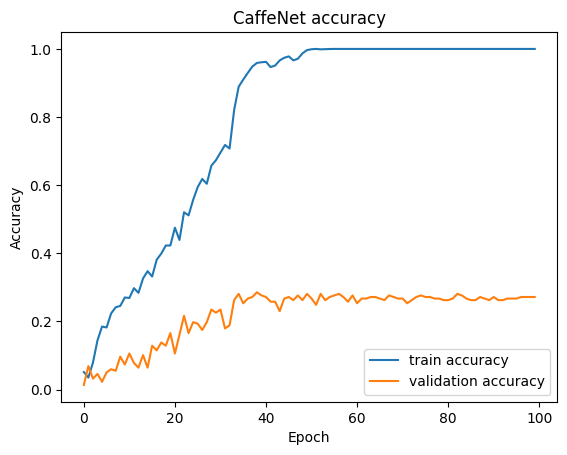

In [11]:
caffe_net_wrapper.plot_accuracy()

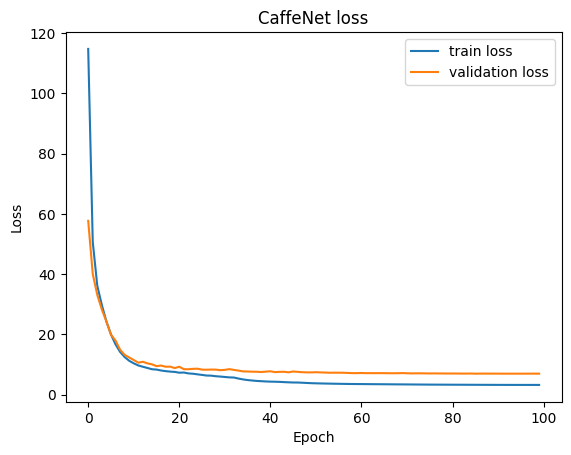

In [12]:
caffe_net_wrapper.plot_loss()

20/20 [==============================] - 1s 21ms/step - loss: 7.0626 - accuracy: 0.2359
Loss: 7.0626
Accuracy: 0.2359
20/20 [==============================] - 0s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.17      0.21        23
           1       0.29      0.24      0.26        25
           2       0.44      0.44      0.44        52
           3       0.19      0.24      0.21        38
           4       0.09      0.07      0.08        27
           5       0.19      0.23      0.21        35
           6       0.17      0.16      0.16        45
           7       0.00      0.00      0.00        10
           8       0.14      0.17      0.15        12
           9       0.33      0.27      0.30        11
          10       0.06      0.04      0.05        23
          11       0.27      0.27      0.27        26
          12       0.18      0.22      0.20        32
          13       0.14      0.20      0.17     

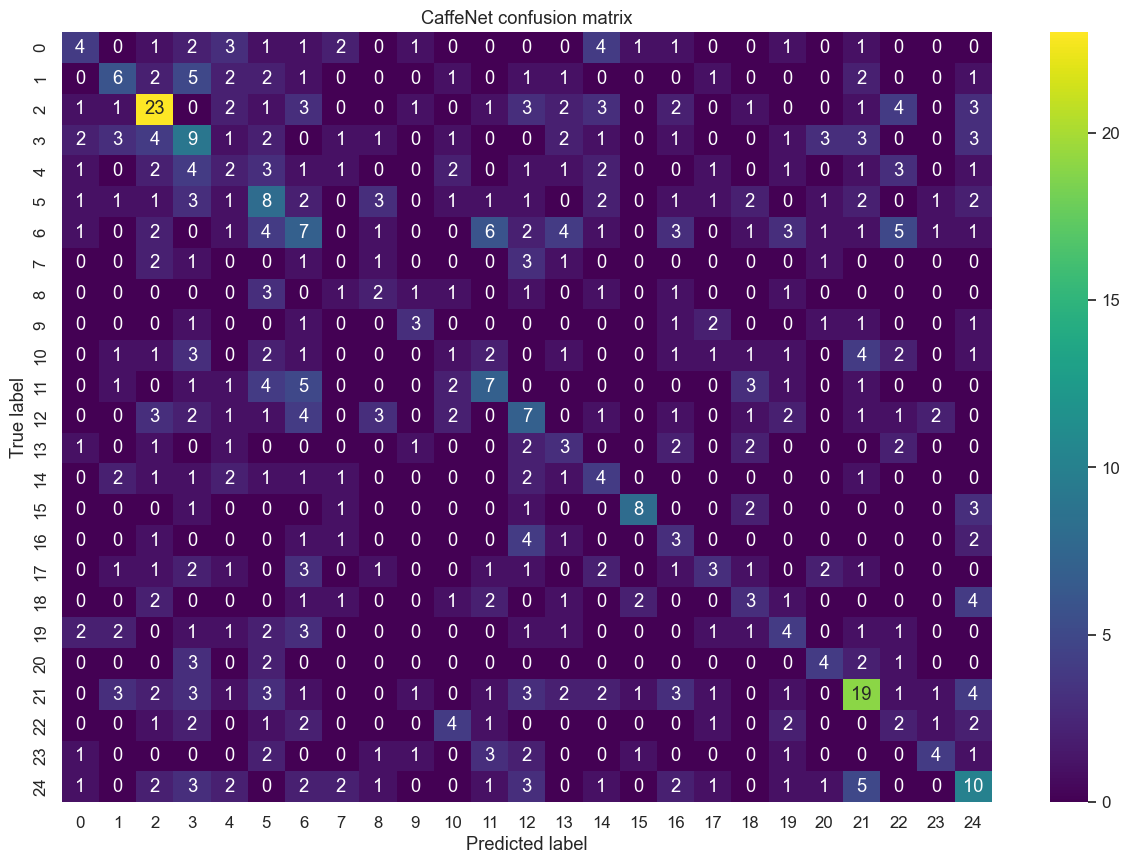

In [13]:
caffe_net_wrapper.display_evaluation_results()